In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
players = pd.read_csv('/Users/user/Documents/GitHub/Fifa Project/fifa-scouting-data.csv',index_col=0)
players = players.drop(['player_wage_Sep2020','player_wage_Aug2019'],axis=1).rename({'DefensiveAwareness_Sep2020':'Marking_Sep2020'},axis=1)

In [3]:
c = Pipeline([('extrac',ColumnExtractor(['ID','Name','Age']))])

NameError: name 'ColumnExtractor' is not defined

In [5]:
c.fit_transform(players)

,ID,Name,Age
0,233848,J. Hauge,19
1,224458,Diogo Jota,22
2,232938,T. Tomiyasu,20
3,253109,J. Veerman,20
4,239818,Rúben Dias,22
...,...,...,...
3664,243129,S. Callegari,22
3665,243393,T. Richards,18
3666,246118,U. Meraş,23
3667,243519,V. Burgoa,18


In [4]:
players.head()

,ID,Name,Age,Nationality,overall_Sep2020,potential_Sep2020,player_value_Sep2020,height_Sep2020,weight_Sep2020,preferred_foot_Sep2020,...,Penalties_Aug2019,Composure_Aug2019,Marking_Aug2019,StandingTackle_Aug2019,SlidingTackle_Aug2019,GKDiving_Aug2019,GKHandling_Aug2019,GKKicking_Aug2019,GKPositioning_Aug2019,GKReflexes_Aug2019
0,233848,J. Hauge,19,Norway,65,78,1000000.0,182.88,165,1,...,59.0,59.0,41.0,34.0,32.0,9.0,7.0,14.0,9.0,8.0
1,224458,Diogo Jota,22,Portugal,80,86,20500000.0,177.80,161,1,...,61.0,84.0,53.0,54.0,39.0,7.0,12.0,15.0,9.0,11.0
2,232938,T. Tomiyasu,20,Japan,72,83,4900000.0,187.96,185,1,...,37.0,59.0,70.0,75.0,73.0,9.0,14.0,6.0,5.0,11.0
3,253109,J. Veerman,20,Netherlands,72,80,4600000.0,185.42,165,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,239818,Rúben Dias,22,Portugal,82,88,27500000.0,187.96,181,1,...,45.0,72.0,79.0,80.0,75.0,7.0,8.0,13.0,7.0,12.0


In [5]:
players.tail()

,ID,Name,Age,Nationality,overall_Sep2020,potential_Sep2020,player_value_Sep2020,height_Sep2020,weight_Sep2020,preferred_foot_Sep2020,...,Penalties_Aug2019,Composure_Aug2019,Marking_Aug2019,StandingTackle_Aug2019,SlidingTackle_Aug2019,GKDiving_Aug2019,GKHandling_Aug2019,GKKicking_Aug2019,GKPositioning_Aug2019,GKReflexes_Aug2019
3664,243129,S. Callegari,22,Argentina,68,78,1300000.0,187.96,183,1,...,45.0,59.0,64.0,70.0,66.0,10.0,7.0,8.0,7.0,12.0
3665,243393,T. Richards,18,England,58,76,250000.0,185.42,172,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3666,246118,U. Meraş,23,Turkey,68,73,1100000.0,177.80,161,0,...,45.0,52.0,61.0,68.0,68.0,6.0,13.0,7.0,15.0,11.0
3667,243519,V. Burgoa,18,Argentina,63,79,750000.0,175.26,161,0,...,50.0,60.0,62.0,62.0,60.0,13.0,6.0,14.0,9.0,13.0
3668,244684,V. Damașcan,20,Moldova,65,77,975000.0,180.34,163,1,...,61.0,62.0,20.0,16.0,14.0,8.0,13.0,8.0,14.0,11.0


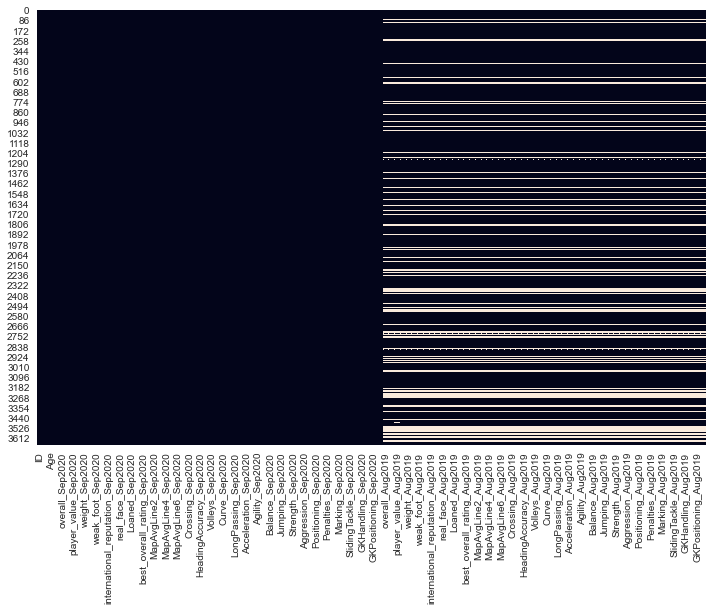

In [6]:
plt.figure(figsize=(12,8))
sns.heatmap(players.isna(),cbar=False);

In [7]:
players['wNanFeatures'] = players.isna().any(axis=1).map(lambda x: 1 if x else 0)
period_columns = players.columns[players.columns.str.contains('_Aug2019')]
for i in period_columns:
    x = i[:-7]
    players[i] = players.apply(lambda row: row[x+'Sep2020'] if pd.isna(row[i]) else row[i], axis=1)

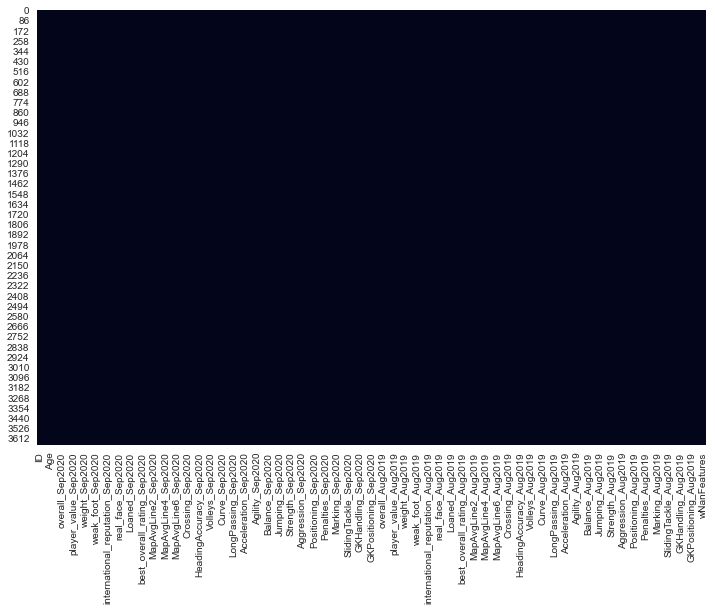

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(players.isna(),cbar=False);

In [9]:
def field_position(arg):
    if arg == 'ST' or arg == 'LS' or arg == 'RS' or arg == 'LW' or arg == 'LF' or arg == 'CF' or arg == 'RF' or arg == 'RW':
        return 'FW'
    elif arg == 'LAM' or arg == 'CAM' or arg == 'RAM' or arg == 'LM' or arg == 'LCM' or arg == 'CM' or arg == 'RCM' or arg == 'RM' or arg == 'CDM':
        return 'MF'
    elif arg == 'LWB' or arg == 'LDM' or arg == 'RDM' or arg == 'RWB' or arg == 'LB' or arg == 'LCB' or arg == 'CB' or arg == 'RCB' or arg == 'RB':
        return 'DF'
    else:
        return 'GK'
players['BestFieldPosition_Sep2020'] = players.best_position_Sep2020.apply(lambda x: field_position(x))
players['BestFieldPosition_Aug2019'] = players.best_position_Aug2019.apply(lambda x: field_position(x))
players['Changed_BP']= players.apply(lambda x: 1 if x.best_position_Sep2020 != x.best_position_Aug2019 else 0,axis=1)
players['Changed_BFP']= players.apply(lambda x: 1 if x.BestFieldPosition_Sep2020 != x.BestFieldPosition_Aug2019 else 0,axis=1)
players['Changed_BPnBFP']= players.apply(lambda x: 1 if x.Changed_BP != x.Changed_BFP else 0,axis=1)

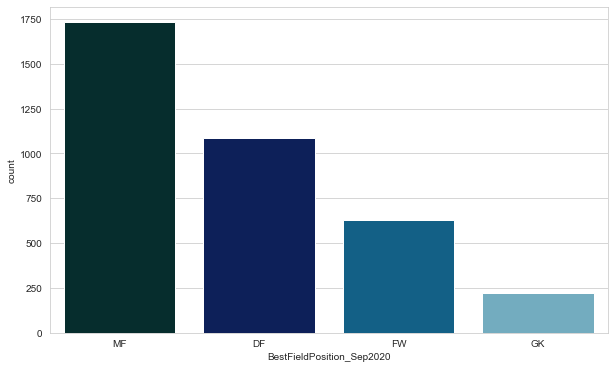

In [10]:
plt.figure(figsize = (10,6))
sns.countplot(x=players.BestFieldPosition_Sep2020,palette='ocean');

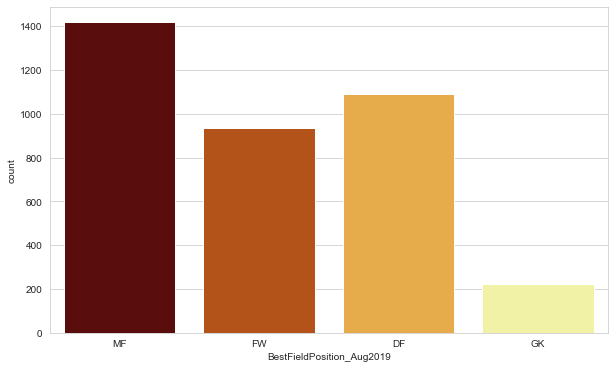

In [11]:
plt.figure(figsize = (10,6))
sns.countplot(x=players.BestFieldPosition_Aug2019,palette='afmhot');

In [12]:
def work_rate_trans(arg):
    work_rate_dict = {'Low/ Low':1, 'Low/ Medium':2, 'Low/ High':3, 'Medium/ Low':4, 'Medium/ Medium':5, 'Medium/ High':6, 'High/ Low':7, 'High/ Medium':8, 'High/ High':9}
    for k,v in work_rate_dict.items():
        if arg == k:
            return v
players['work_rate_Sep2020'] = players.work_rate_Sep2020.apply(lambda x: work_rate_trans(x))
players['work_rate_Aug2019'] = players.work_rate_Aug2019.apply(lambda x: work_rate_trans(x))
players['transfered']= players.apply(lambda x: 1 if x.Club_Sep2020 != x.Club_Aug2019 else 0,axis=1)
players['avg_potential'] = players.apply(lambda X: np.mean([X['potential_Sep2020'],X['potential_Aug2019']]),axis=1)
players = players.drop(['potential_Sep2020','potential_Aug2019'],axis=1)

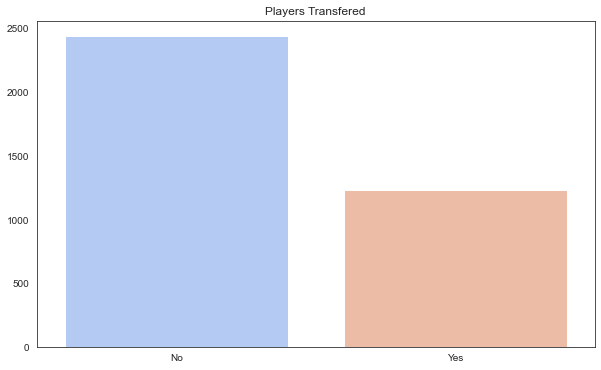

In [13]:
sns.set_style('white')
plt.figure(figsize = (10,6))
sns.barplot(x= ['No','Yes'],y = players.transfered.value_counts().values,palette='coolwarm')
plt.title('Players Transfered');

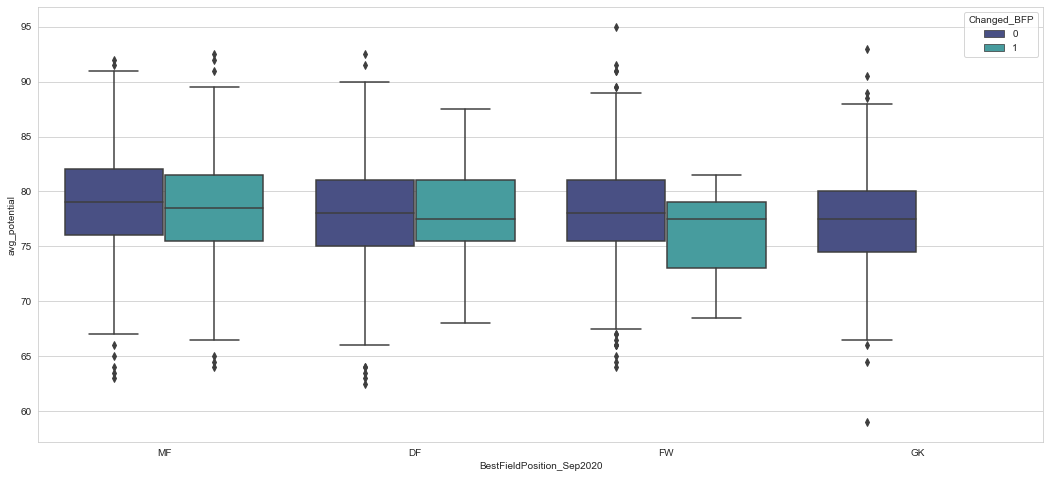

In [14]:
sns.set_style('whitegrid')
plt.figure(figsize = (18,8))
sns.boxplot(x="BestFieldPosition_Sep2020", y="avg_potential", hue="Changed_BFP",data=players, palette="mako");

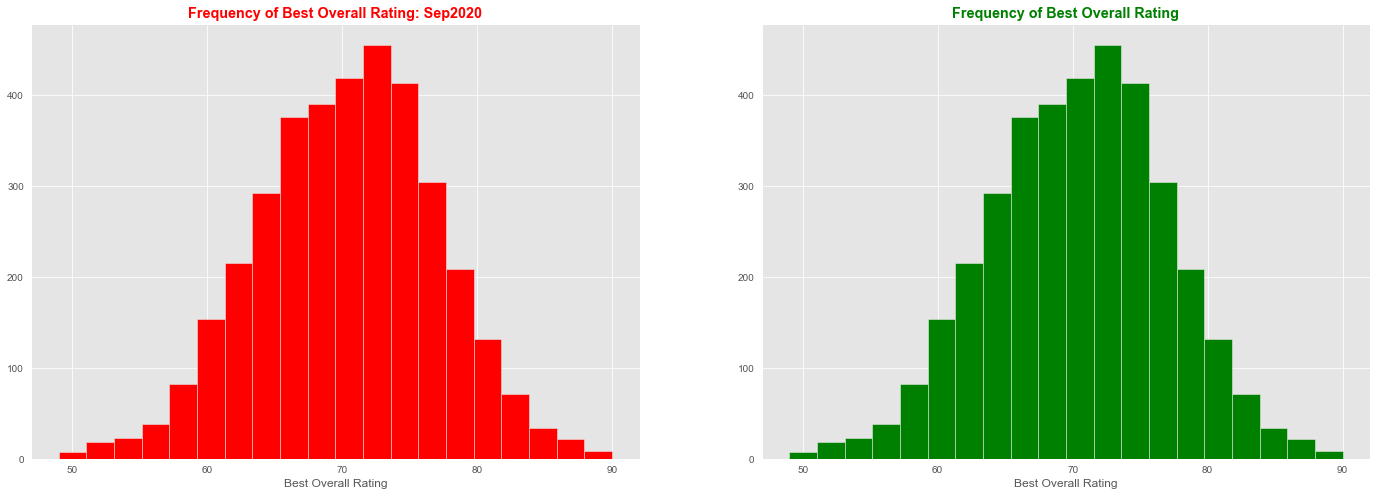

In [15]:
plt.style.use('ggplot')
fig, ax = plt.subplots(1,2,figsize=(24,8))
ax[0].hist(players.best_overall_rating_Sep2020,color='red',bins=20)
ax[0].set_title('Frequency of Best Overall Rating: Sep2020',fontweight='bold',color='red')
ax[0].set_xlabel('Best Overall Rating')
ax[1].hist(players.best_overall_rating_Sep2020,color='green',bins=20)
ax[1].set_title('Frequency of Best Overall Rating',fontweight='bold',color='green')
ax[1].set_xlabel('Best Overall Rating');

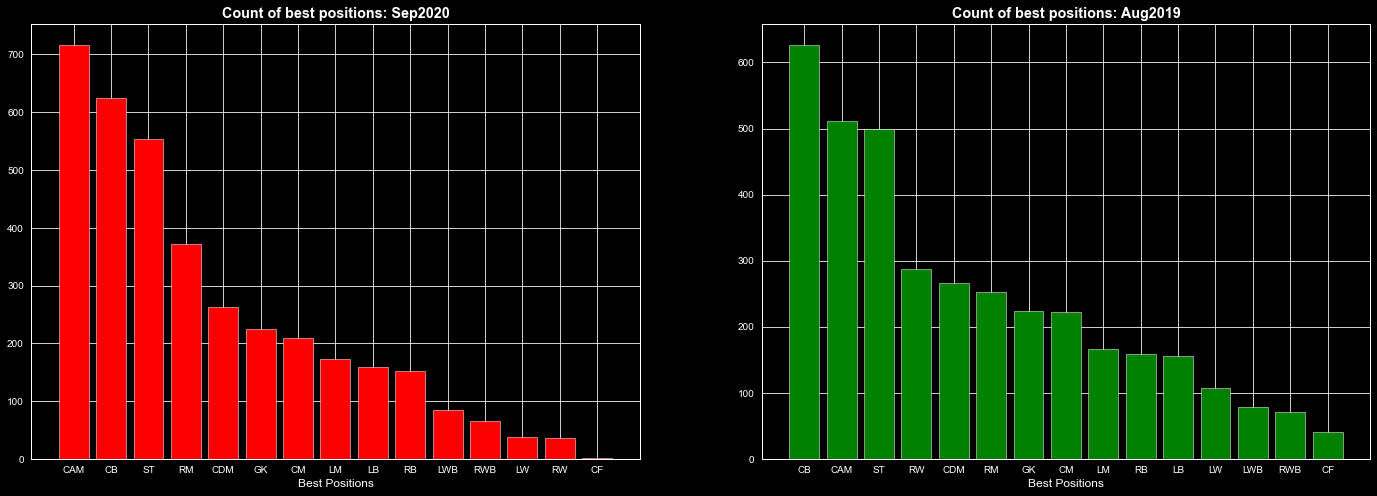

In [16]:
plt.style.use('dark_background')
fig, ax = plt.subplots(1,2,figsize=(24,8))
ax[0].bar(players.best_position_Sep2020.value_counts().index,players.best_position_Sep2020.value_counts().values,color='red')
ax[0].set_title('Count of best positions: Sep2020',fontweight='bold')
ax[0].set_xlabel('Best Positions')
ax[1].bar(players.best_position_Aug2019.value_counts().index,players.best_position_Aug2019.value_counts().values,color='green')
ax[1].set_title('Count of best positions: Aug2019',fontweight='bold')
ax[1].set_xlabel('Best Positions');

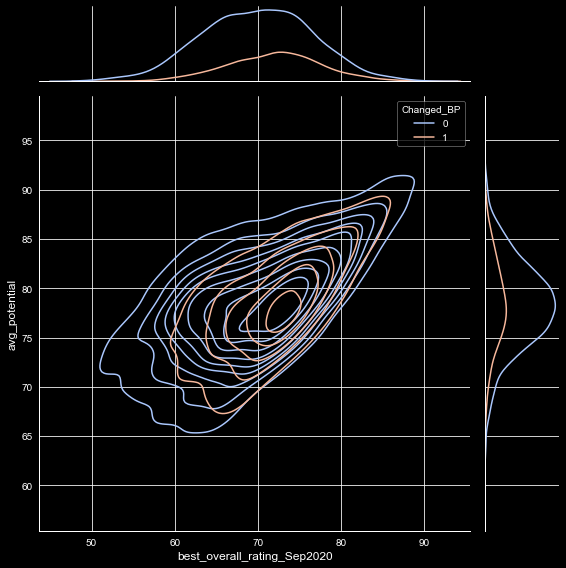

In [17]:
sns.jointplot(x = players.best_overall_rating_Sep2020,y= players.avg_potential,height=8,kind='kde',hue=players.Changed_BP,palette='coolwarm');

In [18]:
OH_encoding_cols = []
CE_cols = []
players2 = players.drop(['ID','Name'],axis=1)
for column in players2.select_dtypes(include='object').columns:
    Number_unique_items = players2[column].nunique()
    if Number_unique_items < 20:
        OH_encoding_cols.append(column)
    else:
        CE_cols.append(column)
    print(f'Column {column} has {Number_unique_items} unique entries.')

Column Nationality has 114 unique entries.
Column Club_Sep2020 has 619 unique entries.
Column best_position_Sep2020 has 15 unique entries.
Column Club_Aug2019 has 658 unique entries.
Column best_position_Aug2019 has 15 unique entries.
Column BestFieldPosition_Sep2020 has 4 unique entries.
Column BestFieldPosition_Aug2019 has 4 unique entries.


In [19]:
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce

In [20]:
OH_encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)
OH_cols_df = pd.DataFrame(OH_encoder.fit_transform(players2[OH_encoding_cols]))
OH_cols_df.index = players2.index
players2 = players2.drop(OH_encoding_cols,axis=1)
players2 = pd.concat([players2,OH_cols_df],axis=1)

In [21]:
from sklearn.model_selection import train_test_split
y = players2.avg_potential
X = players2.drop('avg_potential',axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(X,y,train_size=0.9,test_size=0.1,random_state=15)

In [22]:
target_enc = ce.CatBoostEncoder(cols = CE_cols)
target_enc.fit(X_train[CE_cols],y_train)
X_train = X_train.join(target_enc.transform(X_train[CE_cols]).add_suffix('_targetCE'))
X_train = X_train.drop(CE_cols,axis=1)
X_valid = X_valid.join(target_enc.transform(X_valid[CE_cols]).add_suffix('_targetCE'))
X_valid = X_valid.drop(CE_cols,axis=1)

/Users/user/anaconda3/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [23]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

model = XGBRegressor(n_estimators=1000,learning_rate=0.05,random_state=15)
model.fit(X_train,y_train,early_stopping_rounds=10,eval_set=[(X_valid,y_valid)],verbose=True)
predictions = model.predict(X_valid)

MAE = mean_absolute_error(y_valid,predictions)
print(f'The mean absolute error of the model is {round(MAE,4)}')

[0]	validation_0-rmse:74.00272
Will train until validation_0-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:70.31548
[2]	validation_0-rmse:66.81089
[3]	validation_0-rmse:63.48013
[4]	validation_0-rmse:60.31930
[5]	validation_0-rmse:57.31502
[6]	validation_0-rmse:54.45924
[7]	validation_0-rmse:51.75230
[8]	validation_0-rmse:49.17110
[9]	validation_0-rmse:46.72310
[10]	validation_0-rmse:44.39970
[11]	validation_0-rmse:42.18618
[12]	validation_0-rmse:40.09036
[13]	validation_0-rmse:38.09759
[14]	validation_0-rmse:36.20135
[15]	validation_0-rmse:34.40441
[16]	validation_0-rmse:32.69786
[17]	validation_0-rmse:31.07417
[18]	validation_0-rmse:29.53095
[19]	validation_0-rmse:28.06298
[20]	validation_0-rmse:26.66863
[21]	validation_0-rmse:25.34967
[22]	validation_0-rmse:24.09470
[23]	validation_0-rmse:22.90030
[24]	validation_0-rmse:21.77076
[25]	validation_0-rmse:20.69370
[26]	validation_0-rmse:19.67133
[27]	validation_0-rmse:18.69865
[28]	validation_0-rmse:17.77998
[29]	validation_0

[257]	validation_0-rmse:1.51695
[258]	validation_0-rmse:1.51641
[259]	validation_0-rmse:1.51663
[260]	validation_0-rmse:1.51690
[261]	validation_0-rmse:1.51651
[262]	validation_0-rmse:1.51674
[263]	validation_0-rmse:1.51601
[264]	validation_0-rmse:1.51619
[265]	validation_0-rmse:1.51668
[266]	validation_0-rmse:1.51720
[267]	validation_0-rmse:1.51770
[268]	validation_0-rmse:1.51760
[269]	validation_0-rmse:1.51796
[270]	validation_0-rmse:1.51806
[271]	validation_0-rmse:1.51883
[272]	validation_0-rmse:1.51904
[273]	validation_0-rmse:1.51989
Stopping. Best iteration:
[263]	validation_0-rmse:1.51601

The mean absolute error of the model is 1.1196
